<a href="https://colab.research.google.com/github/shaheriar/CS-228-Deep-Learning-Project/blob/main/CS228FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 228 Final Project
## Enhancing Image Captioning with Deep Learning Models
### Saul Gonzalez - sgonz081
### Shaheriar Malik - smali032

Dataset: https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset

Image captioning is a difficult task that is one step above image classification since we are
generating an actual text description of each image. So, deep learning would be an obvious choice in this case since generating text for a variable input image is a difficult task that would require a complex model.


In [2]:
import random
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import torch
import cv2
import torchvision.transforms as transforms
from torchvision import datasets
from textwrap import wrap
from IPython.display import clear_output
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import os
import natsort
from PIL import Image

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
raw_df = pd.read_csv('/content/drive/MyDrive/ImageCaptioningDataset/results.csv', sep='|')
raw_df.drop([' comment_number'],axis=1, inplace=True)
raw_df.columns = raw_df.columns.str.replace(' ', '')
raw_df

,image_name,comment
0,1000092795.jpg,Two young guys with shaggy hair look at their...
1,1000092795.jpg,"Two young , White males are outside near many..."
2,1000092795.jpg,Two men in green shirts are standing in a yard .
3,1000092795.jpg,A man in a blue shirt standing in a garden .
4,1000092795.jpg,Two friends enjoy time spent together .
...,...,...
158910,998845445.jpg,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,A man is leaning off of the side of a blue an...
158913,998845445.jpg,"A man riding a small boat in a harbor , with ..."


In [4]:
# read, resize and zero pad images. Returns image tensor [3, 256, 256]
def readImage(path):
    desired_size = 256 # 256 x 256
    image = cv2.imread(path)
    old_size = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    image = cv2.resize(image, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    new_im = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    transform = transforms.ToTensor()
    tensor = transform(new_im)
    return tensor

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    num = temp_df.shape[0]
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(num):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
        image = readImage(f"/content/drive/MyDrive/ImageCaptioningDataset/flickr30k_images/{temp_df.image_name[i]}")
        plt.imshow(image.permute(1, 2, 0))
        plt.title("\n".join(wrap(temp_df.comment[i], 30)))

#num = 5
#display_images(raw_df.sample(num))

In [5]:
#X = np.zeros((158915,3,256,256))
#y = list()
#for i in range(len(raw_df)):
#  image = readImage(f"/content/drive/MyDrive/ImageCaptioningDataset/flickr30k_images/{raw_df.image_name[i]}")
#  X[i] = np.array(image)
#  y.append(raw_df.comment[i])
#  clear_output()
#  print(i)


In [10]:
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = os.listdir(data_dir)  # Assumes images are directly under data_dir

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_dir, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        
        if self.transform is not None:
            image = self.transform(image)
        
        # Return the processed image and any associated labels
        return image


In [11]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

data_dir = '/content/drive/MyDrive/ImageCaptioningDataset/flickr30k_images/'  # Replace with your dataset directory
dataset = CustomDataset(data_dir, transform=transform)

In [12]:
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

KeyboardInterrupt: ignored

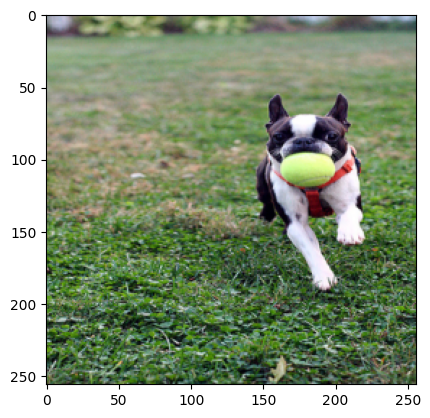

In [18]:
for img in dataloader:
  plt.imshow(img[0].permute(1,2,0))